# Time Series Analysis

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

In [25]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [26]:
figure = px.line(df, x='date', y='meantemp', title='Mean Temperature in Delhi')
figure.show()

In [27]:
figure = px.line(df, x='date', y='humidity', title='Mean Humidity in Delhi')
figure.show()

In [28]:
figure = px.line(df, x='date', y='wind_speed', title='Mean Wind Speed in Delhi')
figure.show()

In [29]:
px.scatter(df, x='humidity', y='meantemp', size='meantemp', trendline='ols')

In [30]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [31]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [32]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


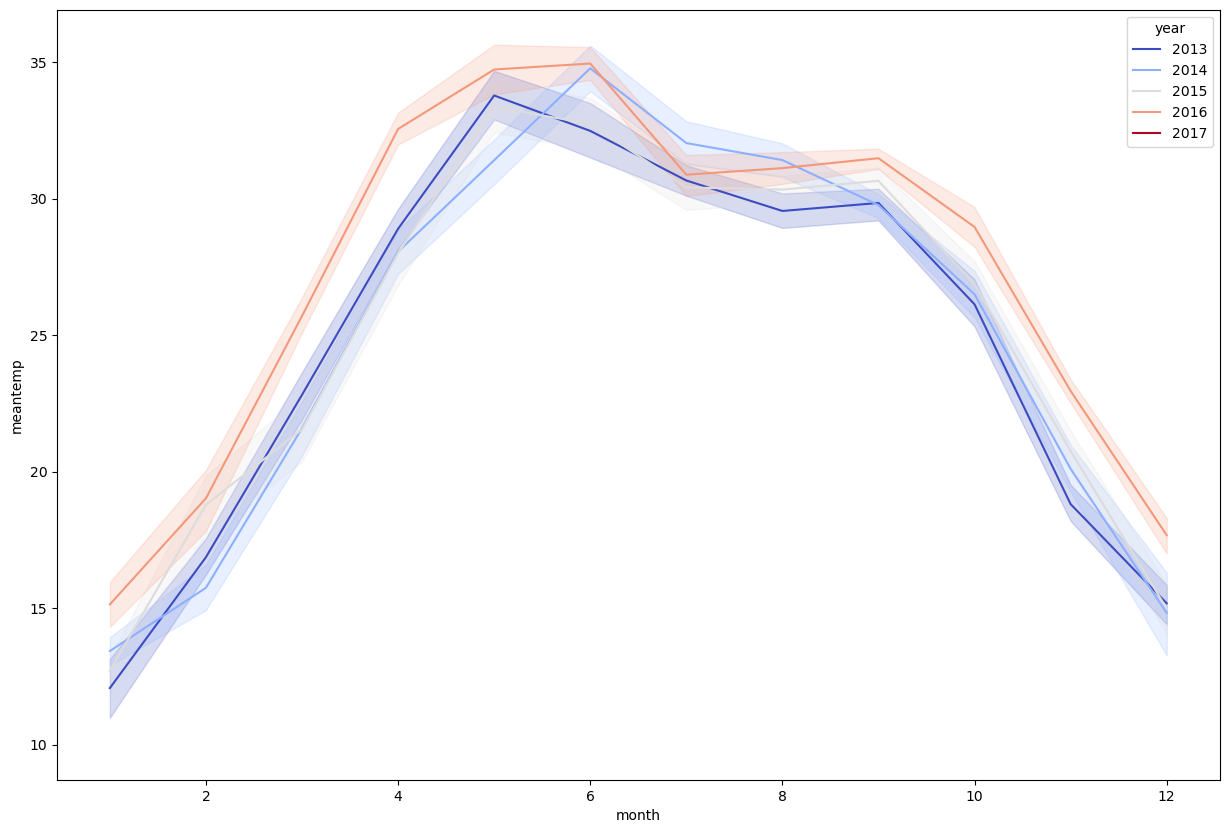

In [34]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='month', y='meantemp', hue='year', data=df, palette='coolwarm');

In [36]:
#pip install prophet

In [39]:
forecast_data = df.rename(columns={'date': 'ds', 'meantemp': 'y'})

In [40]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

12:22:16 - cmdstanpy - INFO - Chain [1] start processing
12:22:17 - cmdstanpy - INFO - Chain [1] done processing
